# ACM-ICPC 2009 日本国内予選 問題B: 島はいくつある？

## 問題の説明

[問題文](https://icpc.iisf.or.jp/past-icpc/domestic2009/all_ja.htm)が[過去問公式サイト](https://icpc.iisf.or.jp/past/)にて公開されているので，問題の説明は省略する．

非常にざっくりと説明すると，陸と海を表す地図が与えられるので，つながった陸地，すなわち島の数を答える問題である．

これはグラフの連結成分数を求める問題そのままである．
地図はメッシュ状なのでグラフ探索を使うのは若干大げさにも思えるが，計算時間的なデメリットはないので，グラフ探索をベースに解くことにする．

## NetworkXをフルに使った解法

[NetworkX](https://networkx.org/)はPythonの（標準でない）モジュールの1つであり，ネットワーク解析用のモジュールである．
細かい説明は省くが，信頼のおけるモジュールである．

まずは，そのNetworkXをフルに使って，問題を解いてみる．
幸いにもGoogle colaboratoryには予めNetworkXがインストールされているので，まずimportする．

In [ ]:
import networkx as nx # 愛称nxでimportするのが一般的のようである．

問題のsample inputの4つ目，すなわち問題文の図B-1をグラフとして入力してみる．
地図をグラフとして表すにあたって，陸に対応する正方形領域，すなわち$c_{i,j} = 1$であるような正方形を頂点とする．
また，地図上で上から$i$番目，左から$j$番目の正方形に対応する頂点の名前を$(i, j)$とする．
以下に入力例を示す．

In [ ]:
G = nx.Graph() # これで変数Gは頂点もエッジもない，空のグラフとなる．
G.add_node((1,1)) # グラフに頂点を追加するにはメソッドadd_nodeを使う．
# add_nodeの第1引数は頂点名であり，頂点名には文字列やタプルなどimmutableなオブジェクトを使える．
G.add_node((1,3))
G.add_node((2,1))
G.add_node((3,1))
G.add_node((3,3))
G.add_node((3,5))
G.add_node((4,1))
G.add_node((4,4))

これでグラフGには，(1,1), (1,3), (3,1), (3,3), (3,5), (4,1), (4,4)の8つの頂点が加えられた．
念の為に確認する．

In [ ]:
G.nodes() # メソッドnodes()でグラフの頂点集合が得られる．

NodeView(((1, 1), (1, 3), (2, 1), (3, 1), (3, 3), (3, 5), (4, 1), (4, 4)))

これだけだと，陸に対応する正方形がどれかという情報を入れたに過ぎない．
次に，どの陸正方形がつながっているか，すなわち隣接しているかという情報をグラフのエッジとして入力する．

In [ ]:
G.add_edge((1,1), (2,1)) # グラフにエッジを追加するにはメソッドadd_edgeを使う．
# add_edgeの第1引数と第2引数はエッジの端点である．
# なお，エッジの端点として指定された頂点がまだそのグラフにない場合には，自動的に新たな頂点として加えられる．
G.add_edge((2,1), (3,1))
G.add_edge((3,1), (4,1))
G.add_edge((3,3), (4,4))
G.add_edge((3,5), (4,4))

これでグラフGには{(1,1), (2,1)}, {(2,1), (3,1)}, {(3,1), (4,1)}, {(3,3), (4,4)}, {(3,5), (4,4)}の5つのエッジが加えられた．
念の為に確認する．

In [ ]:
G.edges() # メソッドedges()でグラフのエッジ集合が得られる．

EdgeView([((1, 1), (2, 1)), ((2, 1), (3, 1)), ((3, 1), (4, 1)), ((3, 3), (4, 4)), ((3, 5), (4, 4))])

これで地図をグラフにしたものが得られた．

さて，次はグラフの連結成分数を求めたいのだが……，実はNetworkXにはグラフの連結成分数を返す関数[number_connected_components](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.number_connected_components.html#networkx.algorithms.components.number_connected_components)がある！
よってそれを使うだけで良い．

In [ ]:
nx.number_connected_components(G)

3

NetworkXには有名なグラフアルゴリズムの実装が用意されているので，そのままで解ける問題も多い．

では，改めて，問題の入力データをファイルから読み込んで，ファイルに出力する関数answerを以下に定義する．

In [ ]:
def answer(input_file_name, output_file_name):
    input_file = open(input_file_name)
    output_file = open(output_file_name, 'w')
    while True:
        w, h = map(int, input_file.readline().split())
        if w == 0 and h == 0:
            break
        c = []
        for i in range(h):
            c.append(list(map(int, input_file.readline().split())))
        G = nx.Graph()
        for i in range(h):
            for j in range(w):
                if c[i][j] == 1:
                    G.add_node((i, j))
                if j < w - 1 and c[i][j] == 1 and c[i][j + 1] == 1:
                    G.add_edge((i, j), (i, j + 1))
                if i < h - 1 and c[i][j] == 1 and c[i + 1][j] == 1:
                    G.add_edge((i, j), (i + 1, j))
                if i < h - 1 and j > 0 and c[i][j] == 1 and c[i + 1][j - 1] == 1:
                    G.add_edge((i, j), (i + 1, j - 1))
                if i < h - 1 and j < w - 1 and c[i][j] == 1 and c[i + 1][j + 1] == 1:
                    G.add_edge((i, j), (i + 1, j + 1))
        output_file.write(f'{nx.number_connected_components(G)}\n')
    input_file.close()
    output_file.close()
    return

この関数を試すために，まず，Googleドライブをマウントする．

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


私は自分のGoogleドライブのディレクトリ
```
/content/drive/MyDrive/Colab Notebooks/情報フルエンシー/0607/
```
に公式からダウンロードしたファイル，B1，B2，B3，B4を置いた．
よって，以下のコードで解答の出力ファイルB1.out，B2.out，B3.out，B4.outを作る．

In [ ]:
input_file_names = ['B1.txt', 'B2.txt', 'B3.txt', 'B4.txt']
file_dir = '/content/drive/MyDrive/Colab Notebooks/情報フルエンシー/0607/'

for input_file_name in input_file_names:
    answer(f'{file_dir}{input_file_name}', f'{file_dir}{input_file_name}.out')

B1.out，B2.out，B3.out，B4.outのそれそれが正しいものになっているか，予め公式からダウンロードしておいた正しい出力例B1.ans，B2.ans，B3.ans，B4.ansとdiffコマンドで比較してみる．

In [ ]:
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B1.out /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B1.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B2.out /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B2.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B3.out /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B3.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B4.out /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B4.ans

diffコマンドで何も表示されないということは，差分がないということなので，B1.out，B2.out，B3.out，B4.outのいずれもが正しいようだ．

## せっかくなのでグラフ描画してみる

問題を解くこととは直接関係ないが，NetworkXを使うと簡単にグラフ描画をできる．
人間は視覚認識に優れているので，グラフ描画すれば直感的に捉えやすいし，ミスの発見の役にも立つ．

NetworkXで描画するためには，別途描画用のモジュールをimportする必要がある．
ここではmatplotlibをimportして使ってみる．
Google colaboratoryにはMatplotlibも予めインストールされているので，importすればすぐに使える．
なお，matplotlibはMATLABのプロット風に作られているので，MATLABに慣れている方にはとても使いやすい（と思う）．

In [ ]:
import matplotlib.pyplot as plt # matplotlibのpyplotだけを使う．

Importしたら早速使ってみる．

NetworkXには[draw](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw)という関数が用意されているので，それで描画できる．
なお，Google colaboratoryやJupyterなどの，IPython系のノートブックでプロットする場合には，コードセルの先頭に
```py
%matplotlib inline
```
と入れると，描画結果がノートブックに埋め込まれて，いい感じになる．

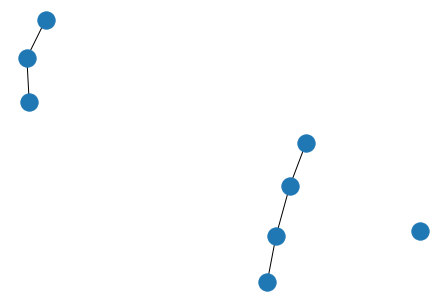

In [ ]:
%matplotlib inline
nx.draw(G) # 最も単純に，drawという関数を使ってみる．

Drawだけだと，頂点の座標は勝手に決められてしまうし，頂点の名前も表示されないから，なんだかわからない．

頂点の名前も表示したい場合には，[draw_networkx](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)を使うのが便利である．

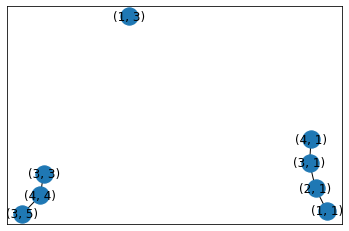

In [ ]:
%matplotlib inline
nx.draw_networkx(G) # 今度は，draw_networkxという関数を使ってみる．

今度は頂点の名前も表示された．
頂点の名前をtupleにしたので，少し見づらい．
頂点の隣接関係は確かに正しいが，それを確認するのも大変である．

問題の入力を直感的に見やすくするために，頂点の座標を指定してみる．
Draw_networkxの第2引数に頂点の座標を与えると，その座標で描画してくれる．
座標は，キーが頂点名，値がタプルの辞書で与える．

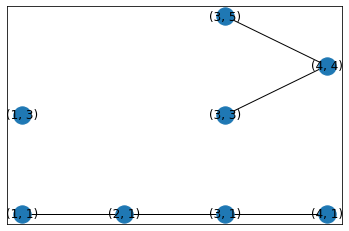

In [ ]:
%matplotlib inline
position = {name: name for name in G.nodes()} # ここでは，座標値もそのまま頂点名にしてみた．
nx.draw_networkx(G, position)

何だか，問題文の図B-1に似た描画となった．
しかし，上下左右は図B-1とは異なる．
ここでは頂点の名前がそのまま座標でもあるので，NetworkXの描画の座標系はいわゆる数学の教科書と同じ座標系であるとわかる．

このグラフをもっと見やすくするために，頂点の色や大きさを変えるとか，頂点名の文字の色や大きさやフォントを変えるとか，いろいろできることはあるがここではその説明は割愛する．

グラフ描画に関してはいずれまた紹介したい．

## NetworkXをデータ構造として使うが，number_connected_componentsは使わない解法

NetworkXの関数number_connected_componentsを使うことで問題は解けてしまった．
しかし，現実で直面する問題がすべてNetworkXで用意されている関数で解けるとは限らない．
まだ誰も解き方を知らない問題を自力で解決するときのための準備として，number_connected_componentsと同等の関数を自力で作ろう．
しかし，最初からすべて作るのは大変であるため，ここではNetworkXをデータ構造として使うことにする．

この問題を解くために必要なのは，連結成分数を返す関数である．
ここでは，

1. グラフGとその頂点のうちの1つsが与えられたら，グラフGの連結成分のうち頂点sを含むものを返すグラフ探索アルゴリズムを関数graph_scanningとして定義し，
1. そのgraph_scanningを繰り返すことでグラフの連結成分数を返す関数number_connected_componentsを自作で定義する，

という2段階で作る．

まず，graph_scanningを以下に定義する．
なお，すでに探索した頂点部分集合を表す変数としてはリストや辞書を使ってもよいが，ここでは[集合](https://colab.research.google.com/drive/177_DsOZZGnwCZ-LLUMi_nL38NULsnecE?usp=sharing)を使うことにする．

In [ ]:
def graph_scanning(G, s):
    visited_nodes = set([s]) 
    boundary_nodes = set([s])
    while len(boundary_nodes) > 0:
        v = boundary_nodes.pop() # boundaryの一個を取り出すpop（リスト・集合などで使えるメソッド）
        for w in G.neighbors(v): # ここでは，NetworkXのグラフのメソッドneighbors(v)でvの隣接頂点を得ている．
            if w not in visited_nodes:
                visited_nodes |= set([w]) # これはvisited_nodes = visited_nodes | set([w])と同じである．
                boundary_nodes |= set([w]) # これはboundary_nodes = boundary_nodes | set([w])と同じである．
    return visited_nodes

試しに，先程のグラフGで実行してみる．

In [ ]:
graph_scanning(G, (1, 1))

{(1, 1), (2, 1), (3, 1), (4, 1)}

In [ ]:
graph_scanning(G, (1, 3))

{(1, 3)}

In [ ]:
graph_scanning(G, (3, 3))

{(3, 3), (3, 5), (4, 4)}

良さそうである．

このgraph_scanningを利用して，与えられたグラフGの連結成分数を返す関数を以下に定義する．

In [ ]:
def number_connected_components(G): # NetworkXに敬意を評して，同じ関数名にする．
    scanned_nodes = set([]) # すでに吟味した頂点の集合を空集合とする．
    # 空集合の記述にはset([])を使う．{}だと空の辞書になってしまう．
    remaining_nodes = set(G.nodes()) # まだ吟味していない頂点の集合をGの頂点集合そのものとする．
    num = 0 # 連結成分数の初期値を0とする．
    while len(remaining_nodes) > 0: # まだ吟味していない頂点があるならば繰り返す．
        v = remaining_nodes.pop() # 集合でもメソッドpopは使えるので，1つ頂点を取り出してそれをvとする．
        num += 1 # 連結成分数を1増やす．
        visited_nodes = set(graph_scanning(G, v)) # その頂点vを含む連結成分（の頂点集合）をvisited_nodesとして，
        scanned_nodes |= visited_nodes # それをすでに吟味した頂点集合に加え，
        remaining_nodes -= visited_nodes # それをまだ吟味していない頂点集合から引く（削除する）．
    return num

では，再び，グラフGで試してみる．

In [ ]:
number_connected_components(G)

3

良いようだ．

念の為，自作のnumber_connected_componentsを利用して問題を解くコードを以下に記し，実行してみる．

In [ ]:
def another_answer(input_file_name, output_file_name):
    input_file = open(input_file_name)
    output_file = open(output_file_name, 'w')
    while True:
        w, h = map(int, input_file.readline().split())
        if w == 0 and h == 0:
            break
        c = []
        for i in range(h):
            c.append(list(map(int, input_file.readline().split())))
        G = nx.Graph()
        for i in range(h):
            for j in range(w): # 入れ子の仕組み（https://utokyo-ipp.github.io/3/3-2.html）
                if c[i][j] == 1:
                    G.add_node((i, j))
                # グラフのエッジを追加する
                if j < w - 1 and c[i][j] == 1 and c[i][j + 1] == 1:
                    G.add_edge((i, j), (i, j + 1))
                if i < h - 1 and c[i][j] == 1 and c[i + 1][j] == 1:
                    G.add_edge((i, j), (i + 1, j))
                if i < h - 1 and j > 0 and c[i][j] == 1 and c[i + 1][j - 1] == 1:
                    G.add_edge((i, j), (i + 1, j - 1))
                if i < h - 1 and j < w - 1 and c[i][j] == 1 and c[i + 1][j + 1] == 1:
                    G.add_edge((i, j), (i + 1, j + 1))
        output_file.write(f'{number_connected_components(G)}\n') # ここだけが先程のanswerと異なる．
        # nx.number_connected_componentsではなく，単なるnumber_connected_componentsになっていることに注意されたい．
    return

input_file_names = ['B1', 'B2', 'B3', 'B4']
file_dir = '/content/drive/My Drive/python/acm_icpc/domestic2009/judgedata/'
for input_file_name in input_file_names:
    another_answer(f'{file_dir}{input_file_name}', f'{file_dir}{input_file_name}.out')

FileNotFoundError: ignored

続けて，diffコマンドで確認してみる．

In [ ]:
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B1.out /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B1.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B2.out /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B2.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B3.out /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B3.ans
!diff /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B4.out /content/drive/'My Drive'/python/acm_icpc/domestic2009/judgedata/B4.ans

diff: /content/drive/My Drive/python/acm_icpc/domestic2009/judgedata/B1.out: No such file or directory
diff: /content/drive/My Drive/python/acm_icpc/domestic2009/judgedata/B1.ans: No such file or directory
diff: /content/drive/My Drive/python/acm_icpc/domestic2009/judgedata/B2.out: No such file or directory
diff: /content/drive/My Drive/python/acm_icpc/domestic2009/judgedata/B2.ans: No such file or directory
diff: /content/drive/My Drive/python/acm_icpc/domestic2009/judgedata/B3.out: No such file or directory
diff: /content/drive/My Drive/python/acm_icpc/domestic2009/judgedata/B3.ans: No such file or directory
diff: /content/drive/My Drive/python/acm_icpc/domestic2009/judgedata/B4.out: No such file or directory
diff: /content/drive/My Drive/python/acm_icpc/domestic2009/judgedata/B4.ans: No such file or directory


正しく実行できているようだ．

## NetworkXを使わない解法

ここまではNetworkXを使った解法を紹介してきた．
しかし，NetworkXを使いたくない（あるいは使えない）場面もある．

1. NetworkXで実装されていない機能・アルゴリズムを使いたい，
1. NetworkXを使うことを禁止されている，

などの場面である．

前者は，高度な仕事や研究をする場面にありがちであろう．
後者は，プログラミング・コンテストなどでありがちである．

以降は，NetworkXを使わない解法を紹介する．

まず，先程自作したnumber_connected_componentsを思い出してほしい．
その中で使ったNetworkXの機能は「指定された頂点vの隣接頂点を得る」ことだけである．
それだけならば，頂点名をキー，その隣接頂点を値とする辞書を作れば十分である．
図B-1に対応するグラフであれば，以下で十分であろう．

In [ ]:
G = {
    (1, 1): [(2, 1)], # 頂点(1, 1)の隣接頂点は(2, 1)のみ
    (1, 3): [], # 頂点(1, 3)には隣接頂点はない
    (2, 1): [(1, 1), (3, 1)], # 頂点(2, 1)の隣接頂点は(1, 1)と(3, 1)
    (3, 1): [(2, 1), (4, 1)],
    (3, 3): [(4, 4)],
    (3, 5): [(4, 4)],
    (4, 1): [(3, 1)],
    (4, 4): [(3, 3), (3, 5)], # 最後のカンマは必要ないが，保守のためには入れるほうが無難
}

それぞれの頂点には，一般に，複数の隣接頂点がある．
よって辞書の値として，リスト以外にも辞書や集合を使っても良い．
しかしここではあえてリストを使った．
理由は以下の2つである．

1. リストで十分であり，辞書や集合に比べてリストのほうが単純なので計算時間も記憶領域も小さくできる（ことが期待できる）．
1. グラフを保持するデータ構造のうち，上記は**頂点隣接リスト**とよばれるものであり，その名前からリストがふさわしい．

前者は，プログラミングやアルゴリズム設計をする際の常套手段である．

後者は，単純に私の好みである．

では，上記の頂点隣接リスト（の辞書表現）を前提として，graph_scanningとnumber_connected_componentsを作り直してみよう．

先程自作した関数と区別するため，それぞれ関数名のうしろに_dictとつけることにする．

**グラフGとその頂点のうちの1つsが与えられたら，グラフGの連結成分のうち頂点sを含むものを返すグラフ探索アルゴリズムを関数graph_scanning_dictとして定義し，
そのgraph_scanning_dictを繰り返すことでグラフの連結成分数を返す関数number_connected_components_dictを自作で定義する**

In [ ]:
def graph_scanning_dict(G, s): # ここでGは頂点隣接リストの辞書表現である．
    visited_nodes = set([s])
    boundary_nodes = set([s]) 
    while len(boundary_nodes) > 0:
        v = boundary_nodes.pop()
        for w in G[v]: # graph_scanningと異なるのは，ここだけである．
            if w not in visited_nodes:
                visited_nodes |= set([w])
                boundary_nodes |= set([w])
    return visited_nodes

# この関数でgraph_scanning_dictを何度も回している
def number_connected_components_dict(G): # ここでもGは頂点隣接リストの辞書表現である．
    # scanned_nodesとremaining_nodesで確認していない座標（node）をそれぞれ用意する
    # はじめに空のscanned_nodesを準備する
    scanned_nodes = set([]) 
    # そして全ての座標の情報（=Gのキー）はremaining_nodesに入れる
    # まだ吟味していない頂点の集合をGの頂点集合そのものとする.
    remaining_nodes = set(G.keys()) # 辞書のメソッドkeys()ですべてのキーが得られる．そしてこの場合，それがグラフの頂点集合になっている．
    # 連結成分数の初期値を0とする
    num = 0 
    
    # まだ吟味していない頂点がある限り続ける
    while len(remaining_nodes) > 0: 
        # remaining_nodesから1つ座標を取り出す
        v = remaining_nodes.pop() 
        # 1つ取り出したので連結成分数の初期値に+1する
        num += 1
        # remaining_nodesから1つ取り出した座標を
        visited_nodes = set(graph_scanning_dict(G, v)) 
        scanned_nodes |= visited_nodes
        remaining_nodes -= visited_nodes
    return num

In [ ]:
def graph_scanning_dict(G, s): # ここでGは頂点隣接リストの辞書表現である．
    visited_nodes = set([s])
    boundary_nodes = set([s]) 
    while len(boundary_nodes) > 0:
        v = boundary_nodes.pop()
        for w in G[v]: # graph_scanningと異なるのは，ここだけである．
            if w not in visited_nodes:
                visited_nodes |= set([w])
                boundary_nodes |= set([w])
    return visited_nodes

では，実行してみる．

In [ ]:
number_connected_components_dict(G)

3

良さそうだ．

では，最後に，このnumber_connected_components_dictを利用して問題を解くコードを以下に書いてみる．
入力データを頂点隣接リストの辞書表現に変換するようにし，さらに，プログラミング・コンテストでも使えるように標準入出力コードとして書いてみる．

In [ ]:
while True:
    w, h = map(int, input().split()) # 標準入力からデータを受け取る．
    if w == 0 and h == 0:
        break
    c = []
    for i in range(h):
        c.append(list(map(int, input().split())))
    G = {} # 空の辞書だが，これは空の頂点隣接リストというつもりである．
    for i in range(h):
        for j in range(w): # 入れ子的なノリ仕組みを利用（https://utokyo-ipp.github.io/3/3-2.html）
            if c[i][j] == 1: # h列内のw行目が陸=1だった時
                G[(i, j)] = [] # それぞれの頂点の，隣接頂点を空リストで初期化する．
    for i in range(h):
        for j in range(w):
            if j < w - 1 and c[i][j] == 1 and c[i][j + 1] == 1:
                G[(i, j)].append((i, j + 1)) # 頂点(i, j)の隣接頂点として(i, j + 1)を追加
                G[(i, j + 1)].append((i, j)) # と同時に，頂点(i, j + 1)の隣接頂点として(i, j)を追加することを忘れない．
            if i < h - 1 and c[i][j] == 1 and c[i + 1][j] == 1:
                G[(i, j)].append((i + 1, j))
                G[(i + 1, j)].append((i, j))
            if i < h - 1 and j > 0 and c[i][j] == 1 and c[i + 1][j - 1] == 1:
                G[(i, j)].append((i + 1, j - 1))
                G[(i + 1, j - 1)].append((i, j))
            if i < h - 1 and j < w - 1 and c[i][j] == 1 and c[i + 1][j + 1] == 1:
                G[(i, j)].append((i + 1, j + 1))
                G[(i + 1, j + 1)].append((i, j))
    print(f'{number_connected_components_dict(G)}') # 完全自作のnumber_connected_components_dictを利用する．

KeyboardInterrupt: ignored

問題文の入出力例を試した限りでは良いようだ．

あとはオンラインジャッジで試してみよう．
[AOJ](http://judge.u-aizu.ac.jp/onlinejudge/index.jsp?lang=j)ならばVolume 11の1160番である．